## Dirichlet Distribution
The [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution) (DD) is a multivariate generalization of the beta distribution. It can be denoted as $Dir(\alpha)$.<br>
The PDF is defined as:
$$\{x_1,\dots,x_K\} \sim \frac{1}{B(\alpha)}\prod_{i=1}^{K} x_i^{\alpha_i-1} $$
where $K\geq2$, $\alpha_i>0$ and $x_i \in (0,1)$. The parameter $\alpha$ is a vector of real numbers $\alpha_1, \alpha_2...\alpha_K$. $\alpha_i$ is called the concentration parameters.<br>
The support of the Dirichlet distribution is the set of K-dimensional vectors $x$ whose entries are real numbers in the interval $(0,1)$ and
where $\sum\limits_{i=1}^n x_i = 1$. These can be viewed as the probabilities of a K-way categorical event.

The Dirichlet distribution is related to the Beta distribution as it's pdf can seen below: 
$$ \{x_1,x_2=(1-x_1)\} \sim \frac{1}{B(\alpha, \beta)} x_1^{\alpha-1} x_2^{\beta-1} $$
the distributions are the same if $K=2$.
The marginal distribution of the Dirichlet distribution is a Beta distribution. The example below is a sample drawn from a $Dir( \alpha=[2.5, 10] )$ where sample size is $N=10000$

https://stats.stackexchange.com/questions/244917/what-exactly-is-the-alpha-in-the-dirichlet-distribution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import Latex

sns.set(color_codes=True)
beta = np.random.beta(a=2.5, b=10, size=10000)
dirichlet = np.random.dirichlet(alpha=[3,10], size=10000)

# beta_graph = sns.distplot(beta, kde=False, fit=stats.gamma);

s = ""
for i, d in enumerate(dirichlet[1:4]):
    s = s + "$$x_{:d} = [{:1.3f},{:1.3f}]$$".format(i, d[0], d[1])
s = s + "$$\\vdots$$"
s = s + "$$x_{N-1}=[0.177,0.823]$$"
s = "sample drawn from $Dir( \\alpha=[2.5, 10] )$:" + s
Latex(s)


<IPython.core.display.Latex object>

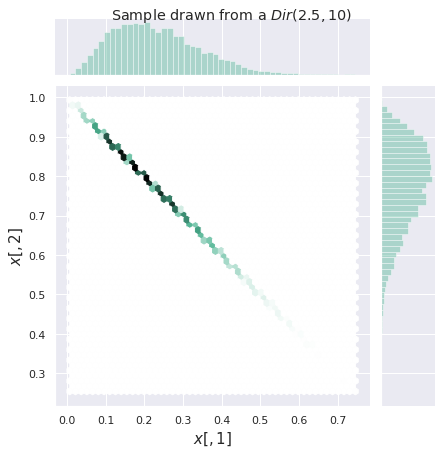

In [2]:
graph = sns.jointplot(x=dirichlet[:,0], y=dirichlet[:,1], kind='hex', color="#4CB391")
graph.set_axis_labels('$x[,1]$', '$x[,2]$', fontsize=15)
graph.fig.suptitle('Sample drawn from a $Dir(2.5,10)$', y=1);

$x[,1]$ are the first column in the vector $x_i$, $x[,2]$ are the second column.<br>
The marginal distribution are shown according to there axis, they are distributed $Beta(a=2.5, b=10)$

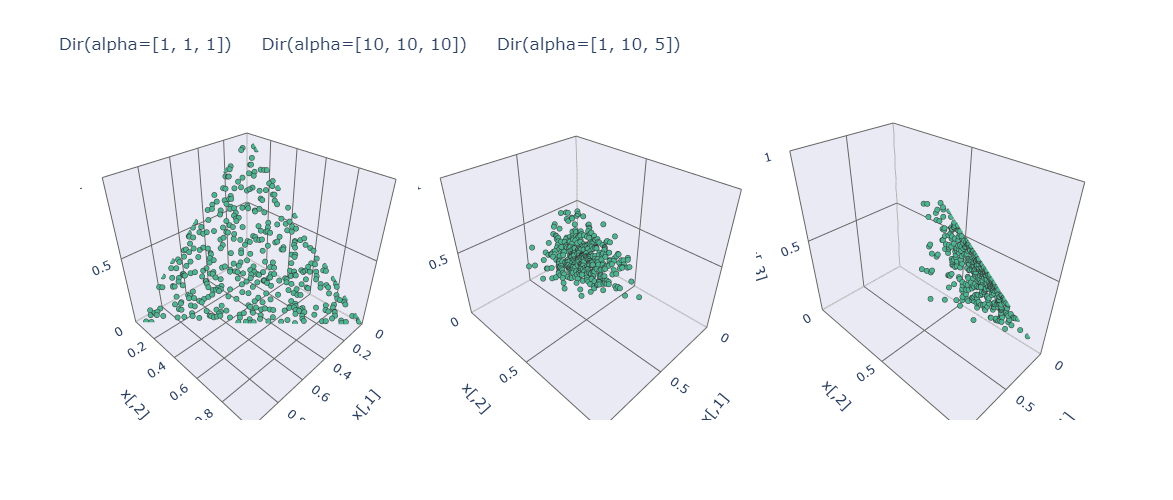

In [3]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import pandas as pd
from plotly import tools
import warnings
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

dir_data1 = np.random.dirichlet(alpha=[1, 1, 1], size=400).transpose()
dir_data2 = np.random.dirichlet(alpha=[10, 10, 10], size=400).transpose()
dir_data3 = np.random.dirichlet(alpha=[1, 10, 5], size=400).transpose()

def create_trace(x, y, z, scene_name):
    trace = go.Scatter3d(
            z=z,
            x=x,
            y=y,
            mode='markers',
            scene=scene_name,
            marker=dict(
                color='rgb(77, 179, 145)',
                size=3,
                symbol='circle',
                line=dict(
                    color='rgb(50, 50, 50)',
                    width=0.001
                ),
                opacity=1
            )
        )
    return trace

trace1 = create_trace(x=dir_data1[0], y=dir_data1[1], z=dir_data1[2], scene_name="scene1")
trace2 = create_trace(x=dir_data2[0], y=dir_data2[1], z=dir_data2[2], scene_name="scene2")
trace3 = create_trace(x=dir_data3[0], y=dir_data3[1], z=dir_data3[2], scene_name="scene3")

scene = dict(xaxis = dict(title='x[,1]', range=[0, 1], backgroundcolor="rgb(234, 234, 244)", showbackground=True, gridcolor="rgb(100,100,100)"),
                 yaxis = dict(title='x[,2]', range=[0, 1], backgroundcolor="rgb(234, 234, 244)", showbackground=True, gridcolor="rgb(100,100,100)"),
                 zaxis = dict(title='x[,3]', range=[0, 1], backgroundcolor="rgb(234, 234, 244)", showbackground=True, gridcolor="rgb(100,100,100)"),
                )

fig = tools.make_subplots(rows=1, cols=3, specs=[[{'is_3d': True}, {'is_3d': True}, {'is_3d': True}]], horizontal_spacing = 0.001)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig['layout']['scene1'].update(scene)
fig['layout']['scene2'].update(scene)
fig['layout']['scene3'].update(scene)
fig['layout'].update(title='Dir(alpha=[1, 1, 1])     Dir(alpha=[10, 10, 10])     Dir(alpha=[1, 10, 5])', height=500, width=1200, showlegend=False)

p = py.iplot(fig);
p